In [1]:
# 개발환경 설정하기

# !pip install plotnine
# !pip install plotnine==0.5.0
# !pip install –upgrade pandas==0.23.4
# !pip install folium==0.5.0
# !pip install missingno
# !pip install pandas==0.23.4

In [2]:
# 라이브러리 import

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import re
from plotnine import *

In [3]:
# 파일 읽기

prc_2019 = pd.read_csv('전국_평균_분양가격_2019.4월_.csv', encoding='euc-kr')
prc_2019.shape

(3655, 5)

In [4]:
# 데이터 어떻게 생겼는지

prc_2019.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [5]:
prc_2019.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
3650,제주,전체,2019,4,3441
3651,제주,전용면적 60㎡이하,2019,4,3804
3652,제주,전용면적 60㎡초과 85㎡이하,2019,4,3475
3653,제주,전용면적 85㎡초과 102㎡이하,2019,4,3226
3654,제주,전용면적 102㎡초과,2019,4,3269


In [6]:
# 데이터는 2015년 10월 ~ 2019년 4월까지 있음
# 데이터 타입보기

prc_2019.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3655 entries, 0 to 3654
Data columns (total 5 columns):
지역명        3655 non-null object
규모구분       3655 non-null object
연도         3655 non-null int64
월          3655 non-null int64
분양가격(㎡)    3440 non-null object
dtypes: int64(2), object(3)
memory usage: 142.9+ KB


In [7]:
# 데이터의 양을 보니 결측값이 있네
# 결측값 구하기

prc_2019.isnull().sum()
# 결측값 215개 존재

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    215
dtype: int64

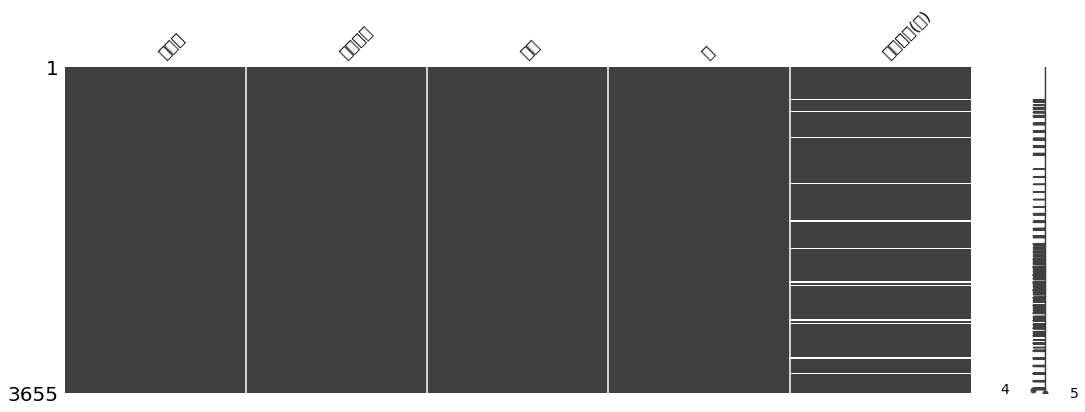

In [8]:
# 결측값 시각화해서 보기

import missingno as msno
msno.matrix(prc_2019, figsize = (18, 6))

# 한글폰트 깨짐

In [9]:
# 한글폰트 설정 보기

# 기본 설정 읽기
import matplotlib.pyplot as plt

# size, family
print('# 설정 되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정 되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )

# 설정 되어있는 폰트 사이즈
10.0
# 설정 되어있는 폰트 글꼴
['sans-serif']


In [10]:
# 나눔고딕으로 폰트 설정하기

plt.rcParams["font.family"] = 'NanumGothic'

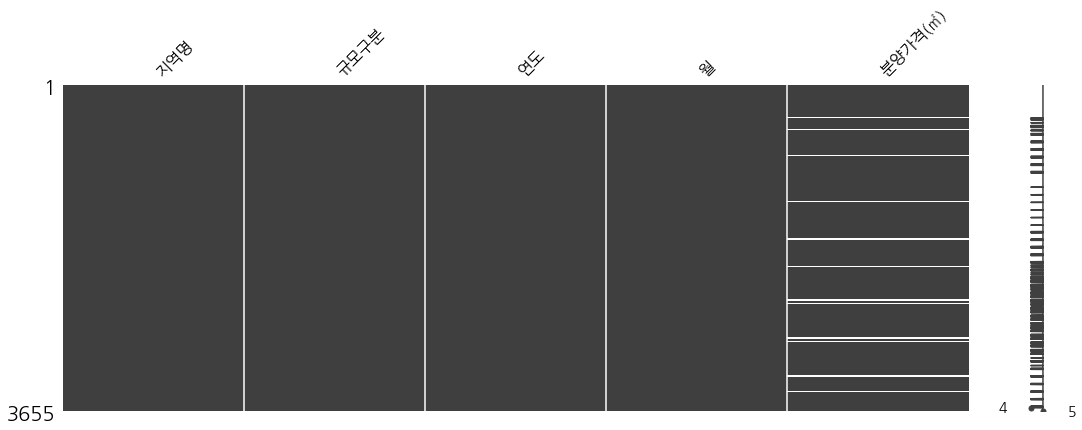

In [11]:
# 다시 결측값 시각화하기

import missingno as msno
msno.matrix(prc_2019, figsize = (18, 6))

In [12]:
# 연도,월 숫자형인데 str으로 변환해야하지.

prc_2019['연도'] = prc_2019['연도'].astype(str)
prc_2019['월'] = prc_2019['월'].astype(str)

# 분양가격은 숫자형으로 변환
# 분양가격 단위때문에 다시 칼럼으로 추가

new_prc_2019 = prc_2019['분양가격(㎡)']

In [13]:
new_prc_2019.head()




0    5841
1    5652
2    5882
3    5721
4    5879
Name: 분양가격(㎡), dtype: object

In [14]:
# 분양가격 숫자형 변환하기

prc_2019['분양가격'] = pd.to_numeric(new_prc_2019, errors= 'coerce')



In [15]:
# 평당 분양가격 변수 추가하기

prc_2019['평당분양가격'] = prc_2019['분양가격'] * 3.3

In [16]:
prc_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3655 entries, 0 to 3654
Data columns (total 7 columns):
지역명        3655 non-null object
규모구분       3655 non-null object
연도         3655 non-null object
월          3655 non-null object
분양가격(㎡)    3440 non-null object
분양가격       3348 non-null float64
평당분양가격     3348 non-null float64
dtypes: float64(2), object(5)
memory usage: 200.0+ KB


In [17]:
# 변수 추가한 다음의 데이터 확인하기

prc_2019.head()

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7


In [18]:
# 결측값 찾기
# 분양가격(m)랑 분양가격 갯수가 다른 이유는
# 문자타입일때 null값을 제대로 보지 못함.
# int형으로 바꾸면서 제대로 바뀌게 됨.

prc_2019.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    215
분양가격       307
평당분양가격     307
dtype: int64

In [19]:
# int형으로 바뀐다음 describe()를 보면 알 수 있음
# int형일땐 사분위수가 나오고
# str형일땐 사분위수가 안나온다.
# describe()은 숫자형만 건들도록 디폴트

prc_2019.describe()

,분양가격,평당분양가격
count,3348.000000,3348.000000
mean,3139.837216,10361.462814
std,1148.137428,3788.853513
min,1868.000000,6164.400000
25%,2390.000000,7887.000000
50%,2792.000000,9213.600000
75%,3396.250000,11207.625000
max,8272.000000,27297.600000


In [20]:
# 특정 값(숫자형 제외)에 대한 describe()

prc_2019.describe(include=[np.object])

,지역명,규모구분,연도,월,분양가격(㎡)
count,3655,3655,3655,3655,3440
unique,17,5,5,12,1549
top,강원,전체,2018,3,2221
freq,215,731,1020,340,17


In [21]:
# 2017년 데이터만 보고 싶을때
# 특정값 볼때는 = loc함수 이용

prc_2019_17 = prc_2019.loc[prc_2019['연도'] == '2017']
prc_2019_17.shape

(1020, 7)

In [22]:
# value_counts() 함수를 활용한 한 필터(인덱스?값)에 대한 groupby 결과치
# 그룹별로 균일한 데이터를 갖고 있음을 확인

prc_2019['규모구분'].value_counts()

전체                   731
전용면적 60㎡이하           731
전용면적 60㎡초과 85㎡이하     731
전용면적 85㎡초과 102㎡이하    731
전용면적 102㎡초과          731
Name: 규모구분, dtype: int64

In [23]:
# 지역별로 균일한 데이터 있는지 확인하기

prc_2019['지역명'].value_counts()

# 균일하게 값을 갖고 있네

강원    215
경남    215
경북    215
충북    215
대전    215
충남    215
세종    215
전남    215
전북    215
서울    215
경기    215
인천    215
제주    215
대구    215
광주    215
부산    215
울산    215
Name: 지역명, dtype: int64

In [24]:
# 연도별로 기초적인 기술통계 해보기1
# T가 없을때

prc_2019.groupby(prc_2019.연도).describe()

분양가격                                                                    \
      count         mean          std     min     25%     50%     75%     max   
연도                                                                              
2015  243.0  2788.707819   976.861182  1868.0  2225.0  2516.0  3025.5  7092.0   
2016  984.0  2934.250000  1071.441561  1900.0  2282.0  2672.0  3148.5  8096.0   
2017  899.0  3139.541713  1107.584870  1976.0  2365.0  2849.0  3456.0  7887.0   
2018  919.0  3326.951034  1186.090839  2076.0  2525.0  2952.0  3698.0  8098.0   
2019  303.0  3522.445545  1301.461948  2152.0  2643.5  3173.0  3985.5  8272.0   

     평당분양가격                                                                 \
      count          mean          std     min      25%      50%       75%   
연도                                                                           
2015  243.0   9202.735802  3223.641902  6164.4  7342.50   8302.8   9984.15   
2016  984.0   9683.025000  3535.757150  6270.0  7530.60   8817.6  10390.05   
2017  899.0  10360.487653  3655.030071  6520.8  7804.50   9401.7  11404.80   
2018  919.0  10978.938411  3914.099768  6850.8  8332.50   9741.6  12203.40   
2019  303.0  11624.070297  4294.824428  7101.6  8723.55  10470.9  13152.15   

               
          max  
연도             
2015  23403.6  
2016  26716.8  
2017  26027.1  
2018  26723.4  
2019  27297.6

In [25]:
# 연도별로 기초적인 기술통계 해보기2
# T가 있을때 ; 행과 열이 뒤바뀜

prc_2019.groupby(prc_2019.연도).describe().T

연도                    2015          2016          2017          2018  \
분양가격   count    243.000000    984.000000    899.000000    919.000000   
       mean    2788.707819   2934.250000   3139.541713   3326.951034   
       std      976.861182   1071.441561   1107.584870   1186.090839   
       min     1868.000000   1900.000000   1976.000000   2076.000000   
       25%     2225.000000   2282.000000   2365.000000   2525.000000   
       50%     2516.000000   2672.000000   2849.000000   2952.000000   
       75%     3025.500000   3148.500000   3456.000000   3698.000000   
       max     7092.000000   8096.000000   7887.000000   8098.000000   
평당분양가격 count    243.000000    984.000000    899.000000    919.000000   
       mean    9202.735802   9683.025000  10360.487653  10978.938411   
       std     3223.641902   3535.757150   3655.030071   3914.099768   
       min     6164.400000   6270.000000   6520.800000   6850.800000   
       25%     7342.500000   7530.600000   7804.500000   8332.500000   
       50%     8302.800000   8817.600000   9401.700000   9741.600000   
       75%     9984.150000  10390.050000  11404.800000  12203.400000   
       max    23403.600000  26716.800000  26027.100000  26723.400000   

연도                    2019  
분양가격   count    303.000000  
       mean    3522.445545  
       std     1301.461948  
       min     2152.000000  
       25%     2643.500000  
       50%     3173.000000  
       75%     3985.500000  
       max     8272.000000  
평당분양가격 count    303.000000  
       mean   11624.070297  
       std     4294.824428  
       min     7101.600000  
       25%     8723.550000  
       50%    10470.900000  
       75%    13152.150000  
       max    27297.600000

In [26]:
# 단위 계산
# pd.options.display.float_format = '{:,.0f}'.format

pd.options.display.float_format = '{:,.0f}'.format
prc_2019.groupby(prc_2019.연도).describe().T

연도             2015   2016   2017   2018   2019
분양가격   count    243    984    899    919    303
       mean   2,789  2,934  3,140  3,327  3,522
       std      977  1,071  1,108  1,186  1,301
       min    1,868  1,900  1,976  2,076  2,152
       25%    2,225  2,282  2,365  2,525  2,644
       50%    2,516  2,672  2,849  2,952  3,173
       75%    3,026  3,148  3,456  3,698  3,986
       max    7,092  8,096  7,887  8,098  8,272
평당분양가격 count    243    984    899    919    303
       mean   9,203  9,683 10,360 10,979 11,624
       std    3,224  3,536  3,655  3,914  4,295
       min    6,164  6,270  6,521  6,851  7,102
       25%    7,342  7,531  7,804  8,332  8,724
       50%    8,303  8,818  9,402  9,742 10,471
       75%    9,984 10,390 11,405 12,203 13,152
       max   23,404 26,717 26,027 26,723 27,298

In [27]:
# 분양가격이 계속 오르고 있음
# 피벗테이블 함수
# pivot_table('값', '인덱스;구분값', '칼럼')
# 규모구분과 연도에 따른 '평당분양가격' 피벗테이블 만들어보기


prc_2019.pivot_table('평당분양가격', '규모구분', '연도' )

연도,2015,2016,2017,2018,2019
규모구분,,,,,
전용면적 102㎡초과,"9,837","10,389","11,334","11,446","12,548"
전용면적 60㎡이하,"8,952","9,399","10,246","10,844","11,181"
전용면적 60㎡초과 85㎡이하,"8,892","9,296","9,825","10,651","11,433"
전용면적 85㎡초과 102㎡이하,"9,519","10,122","10,540","11,442","11,682"
전체,"8,893","9,293","9,901","10,676","11,307"


In [28]:
# 규모구분(volume) 중 '전체' 만 가져오기
# reset_index()를 해야 이쁨

vol_yr_tot = prc_2019.loc[prc_2019['규모구분'] == '전체']
vol_yr = vol_yr_tot.pivot_table('평당분양가격', '지역명', '연도').reset_index()
vol_yr

연도,지역명,2015,2016,2017,2018,2019
0,강원,"7,160","7,011","7,127","7,681","7,967"
1,경기,"10,377","11,220","11,850","13,186","14,268"
2,경남,"7,586","7,848","8,120","9,019","9,549"
3,경북,"7,171","7,361","7,795","8,505","8,710"
4,광주,"8,052","8,899","9,464","9,856","10,928"
5,대구,"9,232","10,310","11,456","12,076","13,168"
6,대전,"8,098","8,502","9,045","10,180","12,020"
7,부산,"10,307","10,430","11,578","12,998","13,308"
8,서울,"19,725","20,663","21,376","22,889","25,396"
9,세종,"8,750","8,860","9,135","10,355","10,414"


In [29]:
# 해석하는 로그 만들기
# 변동액에 대한 것도 계산하기

vol_yr['변동액'] = (vol_yr['2018'] - vol_yr['2017']).astype(int)
max_prc = np.max(vol_yr['변동액'])*1000
min_prc = np.min(vol_yr['변동액'])*1000
mean_prc = np.mean(vol_yr['변동액'])*1000

print('2015년부터 2018년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주이며 상승액은 평당 {:,.0f}원이다.'.format(max_prc))
print('상승액이 가장 작은 지역은 울산이며 평당 {:,.0f}원이다.'.format(min_prc))
print('하지만 나중에 살펴보겠지만 울산에는 결측치가 많다. 따라서 변동액이 가장 작다라고 판단하기 어렵다.')
print('전국 평균 변동액은 평당 {:,.0f}원이다.'.format(mean_prc))

vol_yr

2015년부터 2018년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주이며 상승액은 평당 1,513,000원이다.
상승액이 가장 작은 지역은 울산이며 평당 -1,103,000원이다.
하지만 나중에 살펴보겠지만 울산에는 결측치가 많다. 따라서 변동액이 가장 작다라고 판단하기 어렵다.
전국 평균 변동액은 평당 771,882원이다.


연도,지역명,2015,2016,2017,2018,2019,변동액
0,강원,"7,160","7,011","7,127","7,681","7,967",553
1,경기,"10,377","11,220","11,850","13,186","14,268",1335
2,경남,"7,586","7,848","8,120","9,019","9,549",899
3,경북,"7,171","7,361","7,795","8,505","8,710",710
4,광주,"8,052","8,899","9,464","9,856","10,928",392
5,대구,"9,232","10,310","11,456","12,076","13,168",619
6,대전,"8,098","8,502","9,045","10,180","12,020",1135
7,부산,"10,307","10,430","11,578","12,998","13,308",1419
8,서울,"19,725","20,663","21,376","22,889","25,396",1513
9,세종,"8,750","8,860","9,135","10,355","10,414",1219


/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:449: UserWarning: geom_bar : Removed 22 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


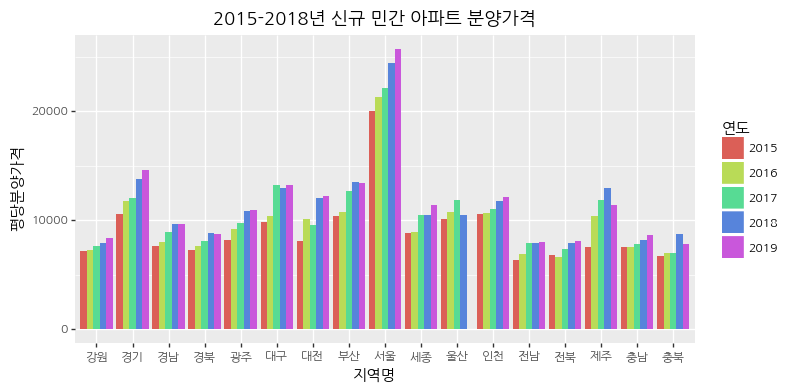

<ggplot: (-9223372029309134392)>

In [30]:
# 그림 그리자 그림
# 지역별 연도별 평당분양가격

(ggplot(vol_yr_tot, aes(x='지역명',  y='평당분양가격', fill='연도'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('2015-2018년 신규 민간 아파트 분양가격')
 + theme(text=element_text(family='NanumGothic'),
         figure_size=(8, 4))
)


In [31]:
prc_2019.pivot_table('평당분양가격', '규모구분', '지역명')

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
규모구분,,,,,,,,,,,,,,,,,
전용면적 102㎡초과,"7,973","14,174","9,718","8,847","10,168","12,551","14,884","12,897","22,461","9,561","9,974","13,954","7,835","8,076","10,300","8,591","8,143"
전용면적 60㎡이하,"7,404","12,815","8,587","7,789","8,955","11,607","8,738","11,111","22,481","9,324","8,965","10,970","7,067","7,545","14,298","7,876","7,056"
전용면적 60㎡초과 85㎡이하,"7,354","12,163","8,361","7,908","9,460","11,331","9,368","11,641","21,815","9,503","10,563","11,073","7,145","7,074","10,240","7,647","7,201"
전용면적 85㎡초과 102㎡이하,"8,223","12,971","9,899","8,780","9,296","10,443","9,037","11,597","23,348","9,517","8,861","11,317","7,937","8,123","10,713","9,010","8,357"
전체,"7,334","12,177","8,397","7,916","9,453","11,310","9,430","11,730","21,870","9,500","10,544","10,933","7,161","7,096","10,449","7,649","7,157"


/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:449: UserWarning: geom_bar : Removed 307 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


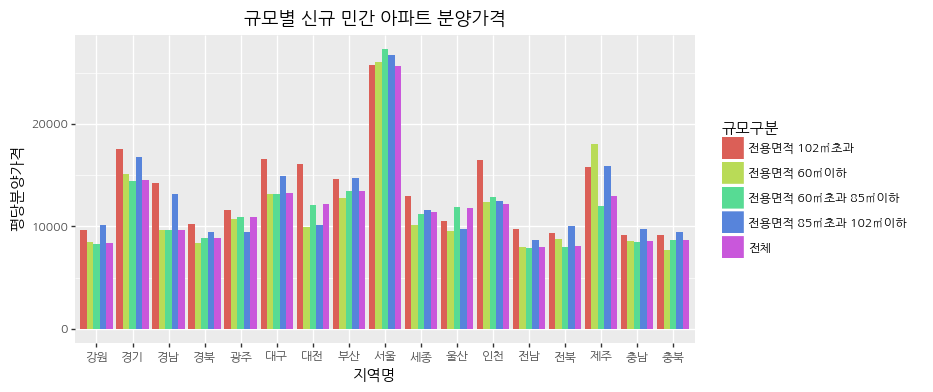

<ggplot: (7547459967)>

In [32]:
# 지역별 규모별 평당분양가격

(ggplot(prc_2019, aes(x='지역명',  y='평당분양가격', fill='규모구분'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('규모별 신규 민간 아파트 분양가격')
 + theme(text=element_text(family='NanumGothic'),
         figure_size=(8, 4))
)


/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:449: UserWarning: geom_bar : Removed 307 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


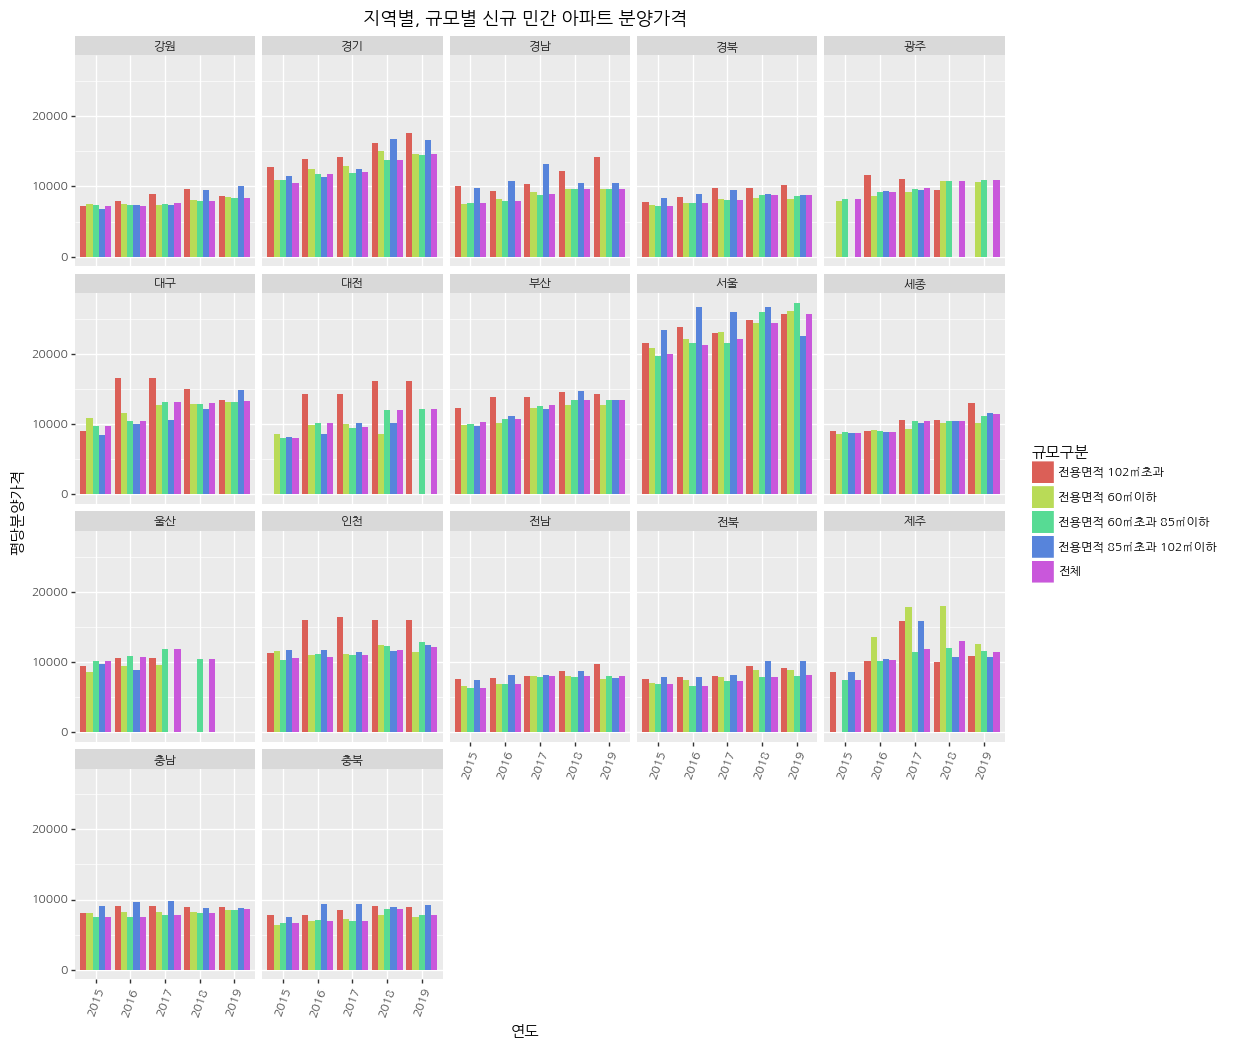

<ggplot: (-9223372029308067475)>

In [33]:
# 지역별로 따로 나누기 

(ggplot (prc_2019)
 + aes(x='연도', y='평당분양가격', fill='규모구분')   # fill : index값 같은 구분값
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('지역별, 규모별 신규 민간 아파트 분양가격')
 + facet_wrap('지역명')                          # 지역별 나누기
 + theme(text=element_text(family='NanumGothic'),
         axis_text_x=element_text(rotation=70),
         figure_size=(12, 12))
)

/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:360: UserWarning: stat_boxplot : Removed 307 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


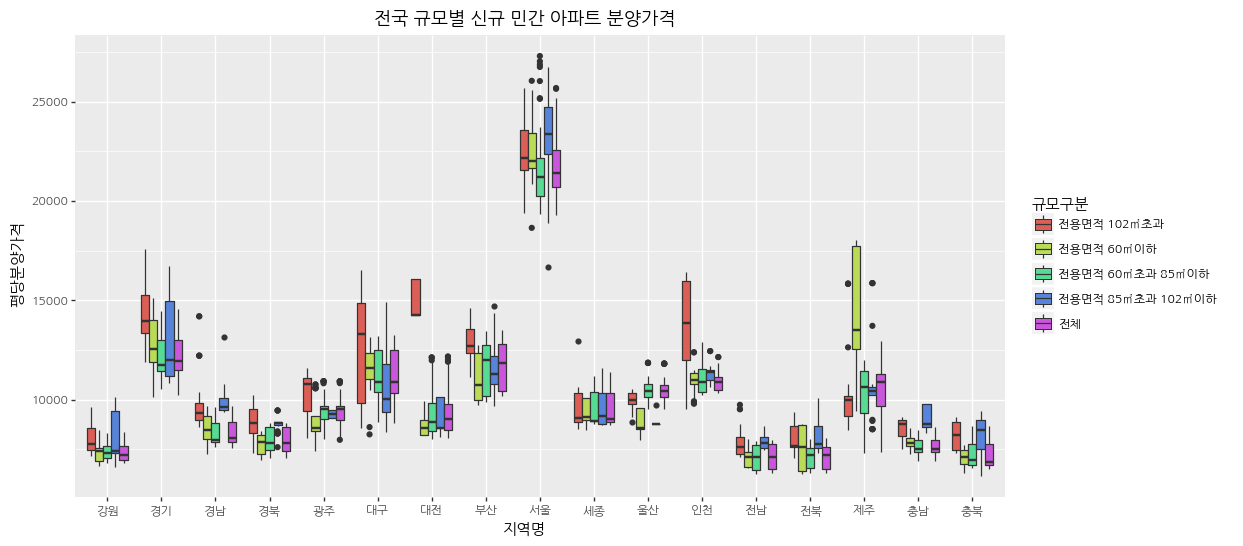

<ggplot: (7546709410)>

In [34]:
# 상자그림 그래프 그리기

(ggplot (prc_2019)
 + aes(x='지역명', y='평당분양가격', fill='규모구분')   # fill : index값 같은 구분값
 + geom_boxplot()
 + ggtitle('전국 규모별 신규 민간 아파트 분양가격')
 + theme(text=element_text(family='NanumGothic'),
         figure_size=(12, 6))
)

/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:360: UserWarning: stat_boxplot : Removed 5 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


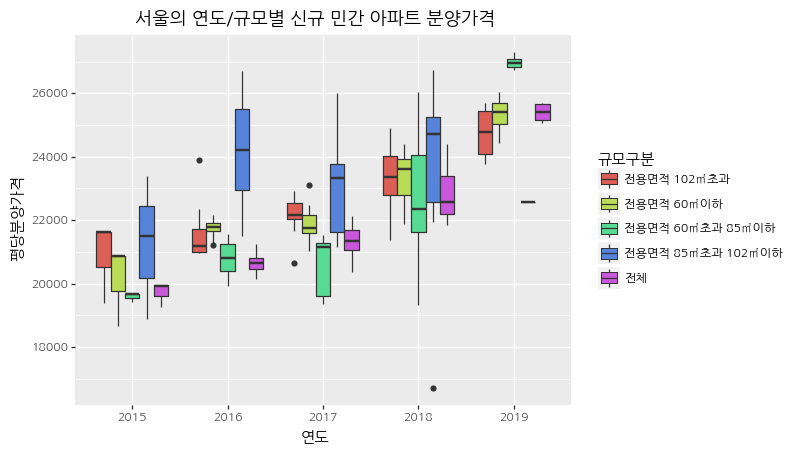

<ggplot: (7547579414)>

In [35]:
# 서울 분양가격만  변동
prc_2019_seoul = prc_2019.loc[prc_2019['지역명'] == '서울']

(ggplot (prc_2019_seoul)
 + aes(x='연도', y='평당분양가격', fill='규모구분')   # fill : index값 같은 구분값
 + geom_boxplot()
 + ggtitle('서울의 연도/규모별 신규 민간 아파트 분양가격')
 + theme(text=element_text(family='NanumGothic'))
         
)

/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:360: UserWarning: stat_boxplot : Removed 28 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


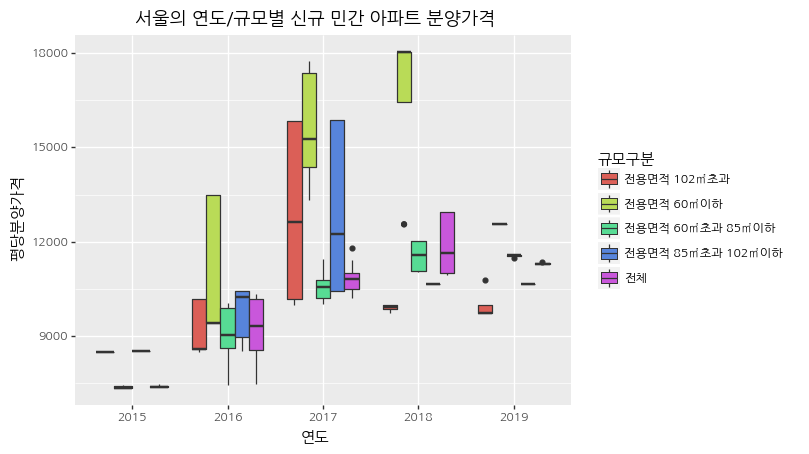

<ggplot: (7547460146)>

In [36]:
# 제주지역 봐보기

prc_2019_seoul = prc_2019.loc[prc_2019['지역명'] == '제주']

(ggplot (prc_2019_seoul)
 + aes(x='연도', y='평당분양가격', fill='규모구분')   # fill : index값 같은 구분값
 + geom_boxplot()
 + ggtitle('서울의 연도/규모별 신규 민간 아파트 분양가격')
 + theme(text=element_text(family='NanumGothic'))
         
)

In [37]:
# 2013년~2015년 데이터 전처리
# 2013~2015년과 2015~2019년 데이터 합쳐야함
# 2013년 데이터 탐색

df = pd.read_csv('지역별_3.3㎡당_평균_분양가격_천원__15.09월.csv', encoding='euc-kr')
df.shape

(24, 27)

In [38]:
df

# df의 형태를 보니 index 0행까지 지워야함

,□ 평균 분양가격,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,구분,NaN,2013년,2014년,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(단위: 천원/3.3㎡)
2,시도,시군구,12월,1월,2월,3월,4월,5월,6월,7월,...,3월,4월,5월,6월,7월,8월,9월,전월비,전년말비,전년동월비
3,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
4,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
5,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
6,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
7,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
8,NaN,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
9,NaN,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414


In [39]:
# 몇번째 행을 스킵한 채로 데이터 조회하기

df = pd.read_csv('지역별_3.3㎡당_평균_분양가격_천원__15.09월.csv', encoding='euc-kr', skiprows=1, header=0)
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,구분,NaN,2013년,2014년,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(단위: 천원/3.3㎡)
1,시도,시군구,12월,1월,2월,3월,4월,5월,6월,7월,...,3월,4월,5월,6월,7월,8월,9월,전월비,전년말비,전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
7,NaN,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
8,NaN,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
9,NaN,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153",...,"8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722


In [40]:
# 연도와 월에 대한 칼럼을 만들기

year = df.iloc[0]       # 0번째 row를 연도
month = df.iloc[1]      # 1번째 row를 월별


In [41]:
year         # 연도가 잘 들어갔는지

Unnamed: 0                구분
Unnamed: 1               NaN
Unnamed: 2             2013년
Unnamed: 3             2014년
Unnamed: 4               NaN
Unnamed: 5               NaN
Unnamed: 6               NaN
Unnamed: 7               NaN
Unnamed: 8               NaN
Unnamed: 9               NaN
Unnamed: 10              NaN
Unnamed: 11              NaN
Unnamed: 12              NaN
Unnamed: 13              NaN
Unnamed: 14              NaN
Unnamed: 15            2015년
Unnamed: 16              NaN
Unnamed: 17              NaN
Unnamed: 18              NaN
Unnamed: 19              NaN
Unnamed: 20              NaN
Unnamed: 21              NaN
Unnamed: 22              NaN
Unnamed: 23              NaN
Unnamed: 24              NaN
Unnamed: 25              NaN
Unnamed: 26    (단위: 천원/3.3㎡)
Name: 0, dtype: object

In [42]:
month

Unnamed: 0        시도
Unnamed: 1       시군구
Unnamed: 2       12월
Unnamed: 3        1월
Unnamed: 4        2월
Unnamed: 5        3월
Unnamed: 6        4월
Unnamed: 7        5월
Unnamed: 8        6월
Unnamed: 9        7월
Unnamed: 10       8월
Unnamed: 11       9월
Unnamed: 12      10월
Unnamed: 13      11월
Unnamed: 14      12월
Unnamed: 15       1월
Unnamed: 16       2월
Unnamed: 17       3월
Unnamed: 18       4월
Unnamed: 19       5월
Unnamed: 20       6월
Unnamed: 21       7월
Unnamed: 22       8월
Unnamed: 23       9월
Unnamed: 24      전월비
Unnamed: 25     전년말비
Unnamed: 26    전년동월비
Name: 1, dtype: object

In [43]:
# 내가 원하는 건 연월이 함께 있는 것
# 새로운 연월 칼럼을 만들어야함
# join = 글자합치기

for i, y in enumerate(year):
    if i > 2 and i < 15:
        year[i] = ' '.join(['2014년', month[i]])
    elif i >= 15 :
        year[i] = ' '.join(['2015년', month[i]])
    elif i == 2:
        year[i] = ' '.join([year[i], month[i]])
    elif i == 1:
        year[i] = '시군구'

print(year)

Unnamed: 0              구분
Unnamed: 1             시군구
Unnamed: 2       2013년 12월
Unnamed: 3        2014년 1월
Unnamed: 4        2014년 2월
Unnamed: 5        2014년 3월
Unnamed: 6        2014년 4월
Unnamed: 7        2014년 5월
Unnamed: 8        2014년 6월
Unnamed: 9        2014년 7월
Unnamed: 10       2014년 8월
Unnamed: 11       2014년 9월
Unnamed: 12      2014년 10월
Unnamed: 13      2014년 11월
Unnamed: 14      2014년 12월
Unnamed: 15       2015년 1월
Unnamed: 16       2015년 2월
Unnamed: 17       2015년 3월
Unnamed: 18       2015년 4월
Unnamed: 19       2015년 5월
Unnamed: 20       2015년 6월
Unnamed: 21       2015년 7월
Unnamed: 22       2015년 8월
Unnamed: 23       2015년 9월
Unnamed: 24      2015년 전월비
Unnamed: 25     2015년 전년말비
Unnamed: 26    2015년 전년동월비
Name: 0, dtype: object


In [44]:
# 만든 연월 칼럼 추가하기

df.columns = year

In [45]:
# 0, 1 인덱스 행 지우기

df = df.drop(df.index[[0,1]])     # 배열 두개 맞음
df

,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,...,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
7,NaN,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
8,NaN,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
9,NaN,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153",...,"8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722
10,NaN,NaN,"8,151","8,355","8,597","8,552","8,585","8,606","8,669","8,648",...,"8,692","8,858","8,967","8,942","8,984","9,058","9,023",-36,325,352
11,경기,NaN,"10,855","10,855","10,791","10,784","10,876","10,646","10,266","10,124",...,"10,469","10,684","10,685","10,573","10,518","10,573","10,341",-232,-38,-160


In [46]:
# 지역 칼럼을 새로 만들어 '구분'과 '시군구'를 합치기
# 구분/시군구 의 null 값은 공백(fillna)으로 채우기

df['구분'] = df['구분'].fillna('')
df['시군구'] = df['시군구'].fillna('')
df

,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,...,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
2,전국,,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
7,,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
8,,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
9,,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153",...,"8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722
10,,,"8,151","8,355","8,597","8,552","8,585","8,606","8,669","8,648",...,"8,692","8,858","8,967","8,942","8,984","9,058","9,023",-36,325,352
11,경기,,"10,855","10,855","10,791","10,784","10,876","10,646","10,266","10,124",...,"10,469","10,684","10,685","10,573","10,518","10,573","10,341",-232,-38,-160


In [47]:
# 공백을 매꾼 칼럼을 지역칼럼으로 추가하자

df['지역'] = df['구분'] + df['시군구']
df['지역']

2          전국
3          서울
4     6대광역시부산
5          대구
6          인천
7          광주
8          대전
9          울산
10           
11         경기
12        수도권
13         세종
14       지방강원
15         충북
16         충남
17         전북
18         전남
19         경북
20         경남
21         제주
22           
Name: 지역, dtype: object

In [48]:
# header에 있는 칼럼을 다 복사하라.
# 아마 행렬 역치 하려고?

melt_columns = df.columns.copy()

In [49]:
melt_columns

Index(['구분', '시군구', '2013년 12월', '2014년 1월', '2014년 2월', '2014년 3월',
       '2014년 4월', '2014년 5월', '2014년 6월', '2014년 7월', '2014년 8월', '2014년 9월',
       '2014년 10월', '2014년 11월', '2014년 12월', '2015년 1월', '2015년 2월',
       '2015년 3월', '2015년 4월', '2015년 5월', '2015년 6월', '2015년 7월', '2015년 8월',
       '2015년 9월', '2015년 전월비', '2015년 전년말비', '2015년 전년동월비', '지역'],
      dtype='object', name=0)

In [50]:
df

,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,...,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비,지역
2,전국,,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207,전국
3,서울,,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434",서울
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,327","9,345","9,515","9,559","9,581","9,608",1,430,477,6대광역시부산
5,,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,446","8,568","8,542","8,542","8,795","8,863",27,400,350,대구
6,,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131,인천
7,,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281,광주
8,,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,145","8,272","8,079","8,079","8,079","7,917",68,610,414,대전
9,,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153",...,"9,380","9,192","9,190","9,190","9,215","9,215",0,324,722,울산
10,,,"8,151","8,355","8,597","8,552","8,585","8,606","8,669","8,648",...,"8,858","8,967","8,942","8,984","9,058","9,023",-36,325,352,
11,경기,,"10,855","10,855","10,791","10,784","10,876","10,646","10,266","10,124",...,"10,684","10,685","10,573","10,518","10,573","10,341",-232,-38,-160,경기


In [51]:
# 지역을 칼럼으로 두고 연월을 하나의 밸류 즉, 데이터 값으로
# |지역|연월1|연월2|연월3|...|     => 이렇게 생긴걸
# ------------------
# |지역|연월|
# |서울|2015년 1월|
# |서울|2015년 2월|
# ------------------         => 이렇게 변환

df_2013_2015 = pd.melt(df, id_vars=['지역'], value_vars=['2013년 12월', '2014년 1월', '2014년 2월', '2014년 3월',
       '2014년 4월', '2014년 5월', '2014년 6월', '2014년 7월', '2014년 8월', '2014년 9월',
       '2014년 10월', '2014년 11월', '2014년 12월', '2015년 1월', '2015년 2월',
       '2015년 3월', '2015년 4월', '2015년 5월', '2015년 6월', '2015년 7월', '2015년 8월',
       '2015년 9월'])
df_2013_2015.head()

,지역,0,value
0,전국,2013년 12월,"8,059"
1,서울,2013년 12월,"18,189"
2,6대광역시부산,2013년 12월,"8,111"
3,대구,2013년 12월,"8,080"
4,인천,2013년 12월,"10,204"


In [52]:
# 알아보기 쉽게 칼럼명 변경

df_2013_2015.columns = ['지역', '연도', '분양가']
df_2013_2015.head()

,지역,연도,분양가
0,전국,2013년 12월,"8,059"
1,서울,2013년 12월,"18,189"
2,6대광역시부산,2013년 12월,"8,111"
3,대구,2013년 12월,"8,080"
4,인천,2013년 12월,"10,204"


In [53]:
# 지역명 정제 1
# 지역 칼럼에 어떤 데이터가 들어가 있는지 보기 value_counts()

df_2013_2015['지역'].value_counts()

           44
인천         22
광주         22
경북         22
제주         22
전북         22
울산         22
전국         22
대구         22
충북         22
수도권        22
지방강원       22
서울         22
대전         22
전남         22
경기         22
6대광역시부산    22
경남         22
세종         22
충남         22
Name: 지역, dtype: int64

In [54]:
# 지역명 정제 2
# 이상한 데이터 정제

df_2013_2015['지역'] = df_2013_2015['지역'].apply(lambda x: re.sub('6대광역시부산', '부산', x))
df_2013_2015['지역'] = df_2013_2015['지역'].apply(lambda x: re.sub('지방강원', '강원', x))

df_2013_2015['지역'].value_counts()

       44
인천     22
광주     22
경북     22
제주     22
전북     22
울산     22
전국     22
대구     22
부산     22
수도권    22
충남     22
서울     22
대전     22
전남     22
경기     22
경남     22
세종     22
강원     22
충북     22
Name: 지역, dtype: int64

In [55]:
# df_2013_2015 데이터 타입 보기

df_2013_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 3 columns):
지역     462 non-null object
연도     462 non-null object
분양가    462 non-null object
dtypes: object(3)
memory usage: 10.9+ KB


In [56]:
# 연도 칼럼을 년, 월 로 나누기
# lambda와 re.sub 사용법 어렵다.

df_2013_2015['년'] = df_2013_2015['연도'].apply(lambda year : year.split('년')[0])
df_2013_2015['월'] = df_2013_2015['연도'].apply(lambda year : re.sub('월', '', year.split('년')[1]).strip())
                                             
df_2013_2015['월']

0      12
1      12
2      12
3      12
4      12
5      12
6      12
7      12
8      12
9      12
10     12
11     12
12     12
13     12
14     12
15     12
16     12
17     12
18     12
19     12
20     12
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
432     8
433     8
434     8
435     8
436     8
437     8
438     8
439     8
440     8
441     9
442     9
443     9
444     9
445     9
446     9
447     9
448     9
449     9
450     9
451     9
452     9
453     9
454     9
455     9
456     9
457     9
458     9
459     9
460     9
461     9
Name: 월, Length: 462, dtype: object

In [57]:
df_2013_2015.info()
df_2013_2015.head()

# 전부다 str형 이다.
# 바꿔야 한다
# 분양가에 ,(콤마)가 존재한다. 빼야한다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 5 columns):
지역     462 non-null object
연도     462 non-null object
분양가    462 non-null object
년      462 non-null object
월      462 non-null object
dtypes: object(5)
memory usage: 18.1+ KB


,지역,연도,분양가,년,월
0,전국,2013년 12월,"8,059",2013,12
1,서울,2013년 12월,"18,189",2013,12
2,부산,2013년 12월,"8,111",2013,12
3,대구,2013년 12월,"8,080",2013,12
4,인천,2013년 12월,"10,204",2013,12


In [58]:
# 데이터 전처리 (str => int) = astype()
# 콤마 제거 => replace

df_2013_2015['분양가'] = df_2013_2015['분양가'].str.replace(',', '').astype(int)
df_2013_2015.head()

,지역,연도,분양가,년,월
0,전국,2013년 12월,8059,2013,12
1,서울,2013년 12월,18189,2013,12
2,부산,2013년 12월,8111,2013,12
3,대구,2013년 12월,8080,2013,12
4,인천,2013년 12월,10204,2013,12


In [59]:
# 결측값 보기

df_2013_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 5 columns):
지역     462 non-null object
연도     462 non-null object
분양가    462 non-null int64
년      462 non-null object
월      462 non-null object
dtypes: int64(1), object(4)
memory usage: 18.1+ KB


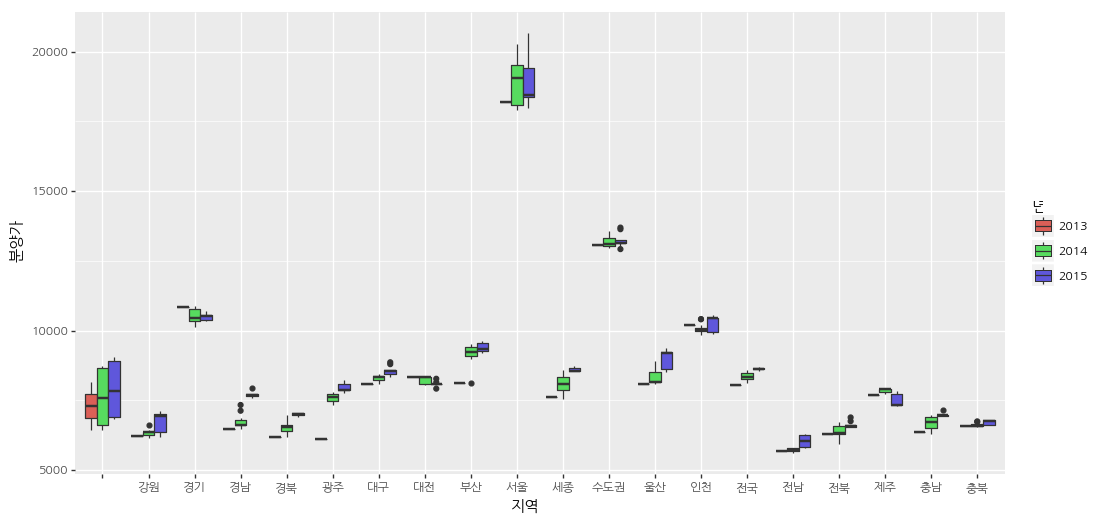

<ggplot: (-9223372029308740306)>

In [60]:
# 전처리 완료됨.
# 시각화하기


(ggplot(df_2013_2015, aes(x='지역', y='분양가', fill='년'))
 + geom_boxplot()
 + theme(text=element_text(family='NanumGothic'),
         figure_size=(12, 6))
)

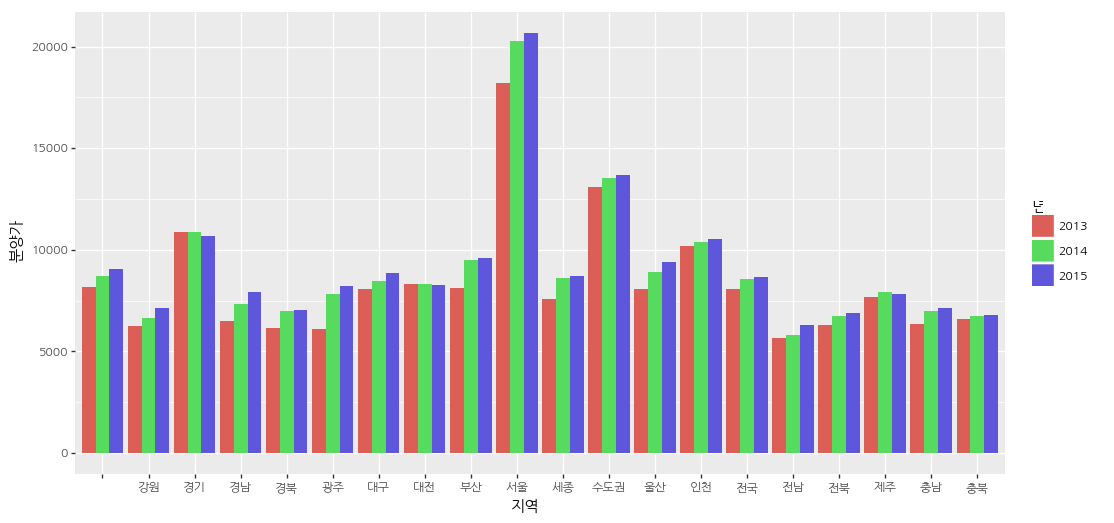

<ggplot: (-9223372029307726876)>

In [62]:

(ggplot(df_2013_2015, aes(x='지역', y='분양가', fill='년'))
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(family='NanumGothic'),
         figure_size=(12, 6))
)

In [69]:
# 2013 ~ 2019 데이터 합치기
# 규모구분은 '전체' 로 통일

df_2015_2019 = prc_2019.loc[prc_2019['규모구분'] == '전체']
print(df_2015_2019.shape)
df_2015_2019.head()


(731, 7)


,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,"5,841","19,275"
5,인천,전체,2015,10,3163,"3,163","10,438"
10,경기,전체,2015,10,3138,"3,138","10,355"
15,부산,전체,2015,10,3112,"3,112","10,270"
20,대구,전체,2015,10,2682,"2,682","8,851"


In [72]:
# 컬럼명 통일하기
# 2013~2015년 칼럼 알아보기
# 이중에 쓸만한거 정하기

df_2015_2019.columns


Index(['지역명', '규모구분', '연도', '월', '분양가격(㎡)', '분양가격', '평당분양가격'], dtype='object')

In [74]:
df_20_1315 = df_2015_2019[['지역명', '연도', '월', '평당분양가격']]
df_20_1315.head()

,지역명,연도,월,평당분양가격
0,서울,2015,10,"19,275"
5,인천,2015,10,"10,438"
10,경기,2015,10,"10,355"
15,부산,2015,10,"10,270"
20,대구,2015,10,"8,851"
